# Prediksi Diabetes Menggunakan Machine Learning Deep Neural Network

Diabetes adalah penyakit kronis yang ditandai dengan tingginya kadar gula darah. Gula darah adalah sumber energi utama bagi sel tubuh manusia. Akan tetapi, pada penderita diabetes, glukosa tersebut tidak dapat digunakan oleh tubuh.

Kadar gula darah dikendalikan oleh hormon insulin yang diproduksi pankreas. Namun, pada penderita diabetes, pankreas tidak mampu memproduksi insulin sesuai kebutuhan tubuh. Tanpa insulin, sel-sel tubuh tidak dapat menyerap dan mengolah glukosa menjadi energi.

Ada dua jenis diabetes, yaitu diabetes tipe 1 dan diabetes tipe 2. Diabetes tipe 1 adalah penyakit autoimun yang menyebabkan sistem kekebalan tubuh menyerang dan menghancurkan sel-sel penghasil insulin di pankreas. Diabetes tipe 2 adalah penyakit yang disebabkan oleh kombinasi faktor genetik, gaya hidup, dan obesitas.

Dataset ini berasal dari POSBINDU Puskesmas Mergangsan. Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah pasien menderita diabetes atau tidak, berdasarkan pengukuran diagnostik tertentu yang disertakan dalam kumpulan data. Beberapa batasan ditempatkan pada pemilihan contoh-contoh ini dari basis data yang lebih besar.

## Tujuan
Peneliti membangun model pembelajaran mesin untuk memprediksi secara akurat apakah pasien dalam dataset tersebut mengidap diabetes atau tidak?

## Detail tentang dataset:

- **SEXVAR**: Jenis Kelamin
- **EDUCA**: Pendidikan Terakhir
- **EMPLOY1**: Status Bekerja
- **_SMOKER3**: Merokok
- **WTKG3**: Berat Badan
- **HTM4**: Tinggi Badan
- **DIABETE4**: Status Diabetes
- **BPHIGH6**: Status Hipertensi / Tekanan Darah Tinggi
- **_AGEG5YR**: Usia
- **EXERANY2**: Aktivitas Fisik
- **ALCDAY5**: Konsumsi Alkohol

**Jumlah Unit Observasi: 100**

**Jumlah Variabel: 11**

-----------------------------------------------------------------------------------------------------------

**1. Import Library** 

   Untuk Running Pre-Processing Model perlu menampilkan beberapa library yang digunakan pada permodelan ini

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import loadtxt

from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

**2. Import Dataset**

Menampilkan dataset kedalam Dataframe

In [33]:
df = pd.read_sas('D:\- Skripsi -\SC DATA\BRFSS DATASET\LLCP2021.XPT')
df.head(5)    # menampilkan data teratas

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000002',2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000003',2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,1.0,1.0,b'01172021',b'01',b'17',b'2021',1100.0,b'2021000004',2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,1.0,b'01152021',b'01',b'15',b'2021',1100.0,b'2021000005',2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [34]:
df.tail(5)    # menampilkan data terbawah

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
438688,78.0,12.0,b'01062022',b'01',b'06',b'2022',1100.0,b'2021001381',2.021001e+09,NaN,...,1.0,1.0,157.0,393.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438689,78.0,12.0,b'01122022',b'01',b'12',b'2022',1100.0,b'2021001382',2.021001e+09,NaN,...,1.0,1.0,200.0,157.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438690,78.0,12.0,b'12212021',b'12',b'21',b'2021',1100.0,b'2021001383',2.021001e+09,NaN,...,1.0,1.0,200.0,143.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438691,78.0,12.0,b'01112022',b'01',b'11',b'2022',1100.0,b'2021001384',2.021001e+09,NaN,...,1.0,1.0,100.0,156.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
438692,78.0,12.0,b'12222021',b'12',b'22',b'2021',1100.0,b'2021001385',2.021001e+09,NaN,...,1.0,1.0,34.0,66.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79


menampilkan jumlah row dan columns

In [35]:
df.shape

(438693, 303)

**3. Menampilkan Tipe Dataset**

In [36]:
df.dtypes  # menampilkan tipe variabel yang terdapat pada dataframe

_STATE      float64
FMONTH      float64
IDATE        object
IMONTH       object
IDAY         object
             ...   
_VEGLT1A    float64
_FRT16A     float64
_VEG23A     float64
_FRUITE1    float64
_VEGETE1    float64
Length: 303, dtype: object

**4. Memilih Atribut Yang Ingin Digunakan**

   pemilihan atribut berdasarkan codebook BRFSS 2021 yang telah ditetapkan sebelumnya, setelah pemilihan selesai diganti dengan penamaan df_percobaanEDA

In [37]:
df_var = df[['SEXVAR','_AGEG5YR','_SMOKER3','_TOTINDA','_BMI5CAT','EMPLOY1','DIABETE4']]
df_var.head(5)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
0,2.0,11.0,3.0,2.0,1.0,7.0,3.0
1,2.0,10.0,4.0,1.0,NaN,8.0,1.0
2,2.0,11.0,4.0,2.0,3.0,7.0,1.0
3,2.0,9.0,4.0,1.0,4.0,7.0,1.0
4,1.0,12.0,4.0,1.0,3.0,8.0,1.0


In [38]:
df_var.tail(5)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
438688,2.0,3.0,3.0,1.0,2.0,1.0,2.0
438689,1.0,13.0,4.0,2.0,NaN,8.0,1.0
438690,1.0,7.0,4.0,1.0,4.0,7.0,3.0
438691,1.0,10.0,4.0,1.0,2.0,7.0,3.0
438692,2.0,6.0,4.0,1.0,4.0,1.0,3.0


In [39]:
df_var.shape

(438693, 7)

**5. Menampilkan Index Atribut Yang Dipilih**

In [40]:
df_var.columns

Index(['SEXVAR', '_AGEG5YR', '_SMOKER3', '_TOTINDA', '_BMI5CAT', 'EMPLOY1',
       'DIABETE4'],
      dtype='object')

**6. Menampilkan Hasil Dari Satu Atribut** 

   fungsinya untuk mengetahui hasil dari atribut "DIABETE4" dikarenakan hasil tersebut menjadi hasil dari dataset diatas, dan menghitung jumlah data spesifik dari columns "DIABETE4"

In [41]:
df_var['DIABETE4'].value_counts()

DIABETE4
3.0    366342
1.0     57616
4.0      9942
2.0      3808
7.0       613
9.0       369
Name: count, dtype: int64

**7. Menghilangkan Data Yang Duplikat**

   fungsinya agar memaksimalkan kerja model dengan mengoptimalkan dataset yang ada dengan menghilangkan dataset yang terduplikat, efek dari data duplikat akan membuat model lama untuk menjalankan Machine Learning

In [42]:
df_var.shape

(438693, 7)

In [43]:
duplicate_row_df_var = df_var[df_var.duplicated()]
print("Jumlah Baris Duplikat:", duplicate_row_df_var.shape) # untuk menampilkan jumlah dataset yang duplikat ada berapa

Jumlah Baris Duplikat: (420602, 7)


**Sebelum Data Duplikat Dihilangkan**

In [44]:
df_var.count()

SEXVAR      438693
_AGEG5YR    438693
_SMOKER3    438693
_TOTINDA    438693
_BMI5CAT    391841
EMPLOY1     435105
DIABETE4    438690
dtype: int64

**Proses Penghapusan Data Yang Duplikat**

disini menjalankan proses penghapusan data yang terduplikat

In [45]:
df_var = df_var.drop_duplicates()
df_var.head(5)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
0,2.0,11.0,3.0,2.0,1.0,7.0,3.0
1,2.0,10.0,4.0,1.0,NaN,8.0,1.0
2,2.0,11.0,4.0,2.0,3.0,7.0,1.0
3,2.0,9.0,4.0,1.0,4.0,7.0,1.0
4,1.0,12.0,4.0,1.0,3.0,8.0,1.0


In [46]:
df_var.tail(5)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
438319,1.0,2.0,2.0,2.0,2.0,3.0,3.0
438327,2.0,2.0,4.0,1.0,2.0,4.0,2.0
438345,2.0,9.0,1.0,2.0,3.0,2.0,1.0
438359,2.0,1.0,9.0,2.0,NaN,1.0,4.0
438594,2.0,14.0,1.0,2.0,NaN,2.0,1.0


**Setelah Data Di Hapus Duplikatnya**

In [47]:
df_var.count()

SEXVAR      18091
_AGEG5YR    18091
_SMOKER3    18091
_TOTINDA    18091
_BMI5CAT    14270
EMPLOY1     17908
DIABETE4    18089
dtype: int64

In [48]:
df_var.shape

(18091, 7)

**8. Menghilangkan Data Yang Bernilai "NOL"**

   Pada DNN, langkah ini penting dikarenakan perlunya mengetahui serta menghapus data yang bersifat "NULL", ada beberapa cara untuk mengatasi miss value ini dengan mencari rata2 dari tiap atribut, dengan mengisi data yang "NULL" dengan nilai yang sama semua, dan menghitung nilai "NULL" dengan diperkirakan secara manual.

In [49]:
print(df_var.isnull().sum())

SEXVAR         0
_AGEG5YR       0
_SMOKER3       0
_TOTINDA       0
_BMI5CAT    3821
EMPLOY1      183
DIABETE4       2
dtype: int64


keterangan diatas menunjukkan bahwa yang terdapat missing value dari setiap atribut terdapat pada atribut

**EDUCA, EMPLOY1, WTKG3, HTM4, DIABETE4, BPHIGH6, EXERANY2 dan ALCDAYS.**

kemudian, disini akan dilakukan nya pembersihan missing value atau nilai yang kosong

In [50]:
df_var = df_var.dropna()    #Sebelum Dilakukan Dropping Missing Value
df_var.count()

SEXVAR      14269
_AGEG5YR    14269
_SMOKER3    14269
_TOTINDA    14269
_BMI5CAT    14269
EMPLOY1     14269
DIABETE4    14269
dtype: int64

In [51]:
print(df_var.isnull().sum())   #Setelah dilakukan Dropping Missing Value

SEXVAR      0
_AGEG5YR    0
_SMOKER3    0
_TOTINDA    0
_BMI5CAT    0
EMPLOY1     0
DIABETE4    0
dtype: int64


setelah proses selesai kita cek kembali dataframe yang tadi telah dilakukan proses penghilangan missing value

In [52]:
df_var.head(5)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
0,2.0,11.0,3.0,2.0,1.0,7.0,3.0
2,2.0,11.0,4.0,2.0,3.0,7.0,1.0
3,2.0,9.0,4.0,1.0,4.0,7.0,1.0
4,1.0,12.0,4.0,1.0,3.0,8.0,1.0
5,1.0,13.0,3.0,2.0,2.0,7.0,3.0


In [53]:
df_var.tail(5)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
438191,2.0,4.0,3.0,2.0,3.0,9.0,3.0
438238,2.0,12.0,4.0,1.0,3.0,8.0,2.0
438319,1.0,2.0,2.0,2.0,2.0,3.0,3.0
438327,2.0,2.0,4.0,1.0,2.0,4.0,2.0
438345,2.0,9.0,1.0,2.0,3.0,2.0,1.0


In [54]:
df_var.shape

(14269, 7)

**9. Outlier**

In [55]:
for feature in df_var:
    
    Q1 = df_var[feature].quantile(0.25)
    Q3 = df_var[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df_var[(df_var[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

SEXVAR no
_AGEG5YR no
_SMOKER3 yes
_TOTINDA yes
_BMI5CAT no
EMPLOY1 no
DIABETE4 yes


<function matplotlib.pyplot.show(close=None, block=None)>

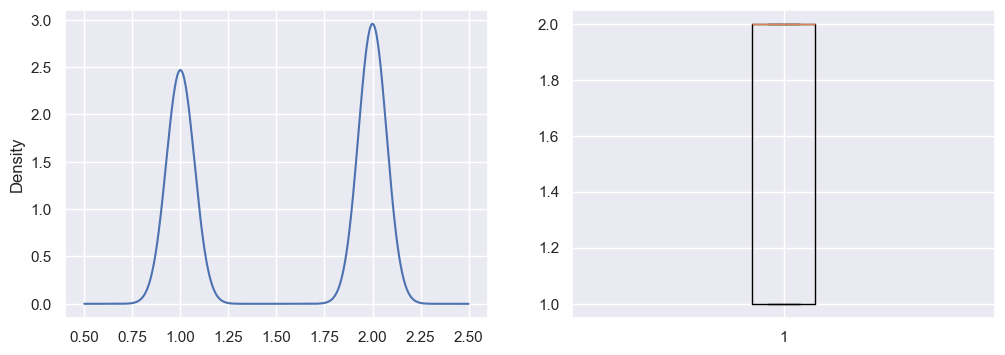

In [56]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df_var['SEXVAR'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df_var['SEXVAR'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

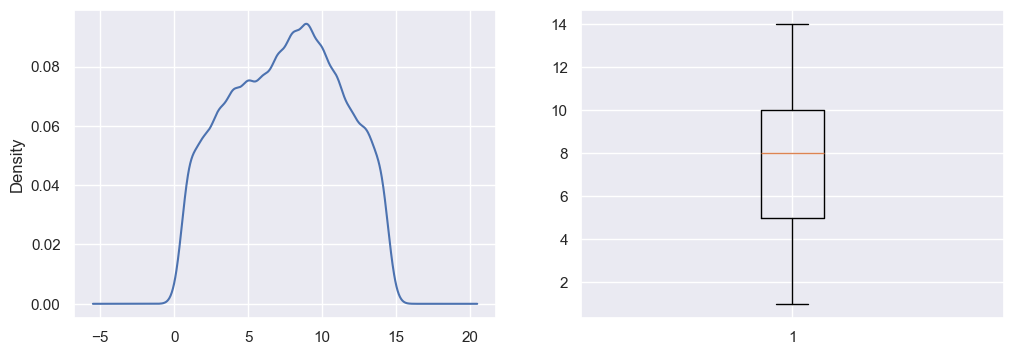

In [57]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df_var['_AGEG5YR'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df_var['_AGEG5YR'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

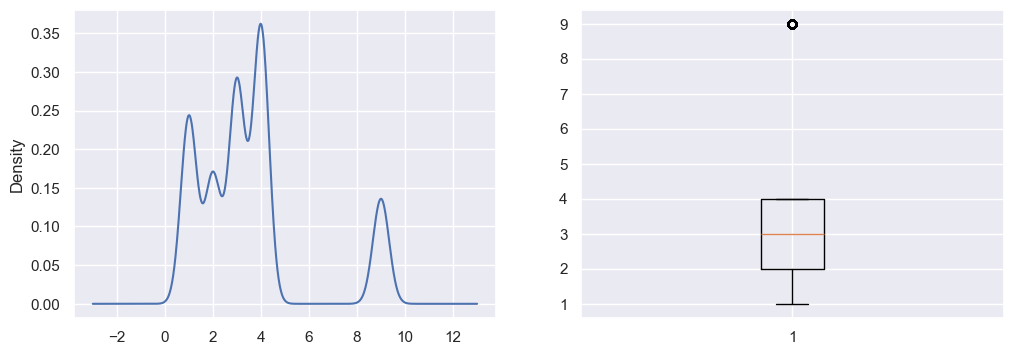

In [58]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df_var['_SMOKER3'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df_var['_SMOKER3'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

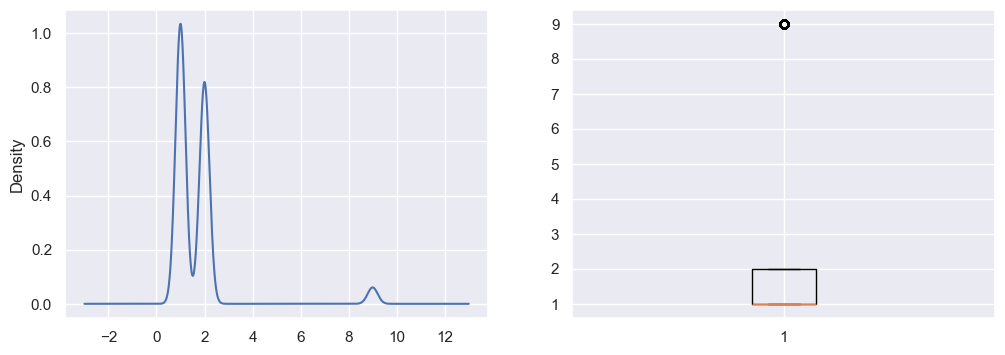

In [59]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df_var['_TOTINDA'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df_var['_TOTINDA'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

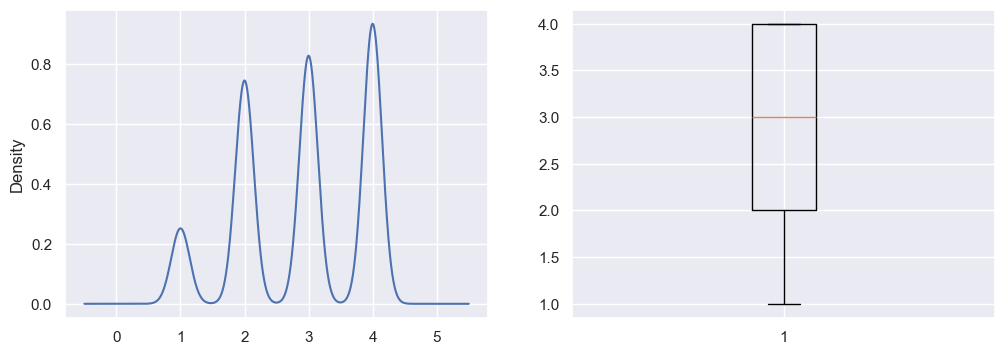

In [60]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df_var['_BMI5CAT'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df_var['_BMI5CAT'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

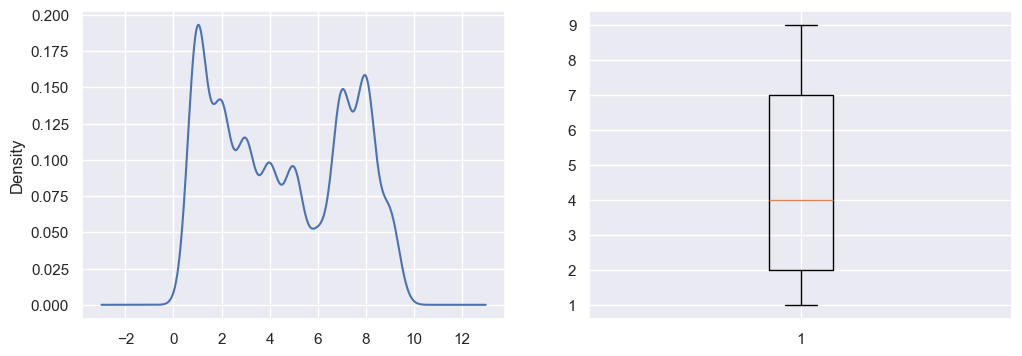

In [61]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df_var['EMPLOY1'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df_var['EMPLOY1'])
plt.show

**10. Seleksi Fitur**

In [62]:
df_var.corr()

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
SEXVAR,1.000000,0.001230,-0.006030,-0.032800,-0.018204,0.013891,-0.046010
_AGEG5YR,0.001230,1.000000,0.044388,0.062841,-0.018195,0.138200,-0.014300
_SMOKER3,-0.006030,0.044388,1.000000,0.000959,0.029810,-0.002431,0.018345
_TOTINDA,-0.032800,0.062841,0.000959,1.000000,0.043025,0.026882,0.005327
_BMI5CAT,-0.018204,-0.018195,0.029810,0.043025,1.000000,-0.001720,-0.006288
EMPLOY1,0.013891,0.138200,-0.002431,0.026882,-0.001720,1.000000,-0.004426
DIABETE4,-0.046010,-0.014300,0.018345,0.005327,-0.006288,-0.004426,1.000000


Menampilkan Correlation Matrix

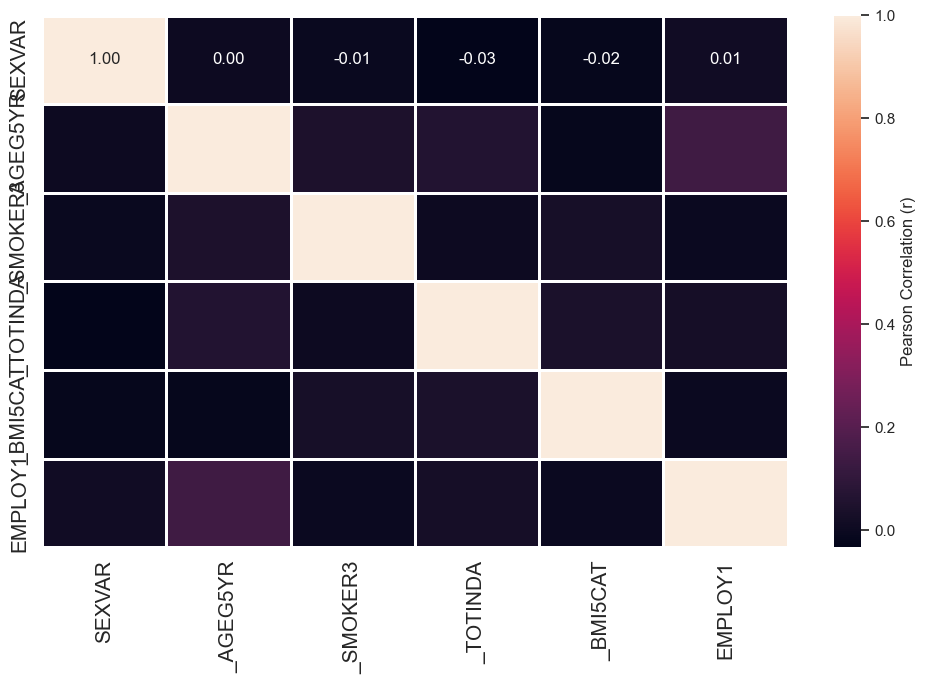

In [63]:
plt.figure(figsize=(10,7))
corr_mat = df_var.iloc[:,:-1].corr()
sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=2, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.tight_layout()

Dashboard Sweetviz

In [64]:
#sns.pairplot(df_var.iloc[:,:-1], diag_kind='hist')

**Pemilahan Nilai Fitur Yang Terdapat Pada Setiap Atribut**

Proses ini dilakukan karena pada penelitian kali ini hanya menerapkan **Multi-Label Function** pada nilai target ataupun pada atribut **DIABETE4**

Penelitian ini menggunakan 2 Nilai pada atribut target **DIABETE4**, yaitu 
1. YES
2. NO

In [65]:
df_var = df_var[df_var["DIABETE4"] != 2]      # Menghilangkan Nilai didalam Atribut yang tidak bernilai 1 dan 3 pada atribut DIABETE4
df_var = df_var[df_var["DIABETE4"] != 4]
df_var = df_var[df_var["DIABETE4"] != 7]
df_var = df_var[df_var["DIABETE4"] != 9]

df_var = df_var[df_var["_AGEG5YR"] != 1]      # Menghilangkan nilai 1, 2, dan 14 pada atribut _AGEG5YR
df_var = df_var[df_var["_AGEG5YR"] != 2]
df_var = df_var[df_var["_AGEG5YR"] != 14]

df_var = df_var[df_var["_TOTINDA"] != 9]      # Menghilangkan nilai 9 pada atribut _TOTINDA

df_var = df_var[df_var["_SMOKER3"] != 2]      # Menghilangkan nilai 2, 3, 9 pada atribut _SMOKER3
df_var = df_var[df_var["_SMOKER3"] != 3]
df_var = df_var[df_var["_SMOKER3"] != 9]

df_var.head(20)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
2,2.0,11.0,4.0,2.0,3.0,7.0,1.0
3,2.0,9.0,4.0,1.0,4.0,7.0,1.0
4,1.0,12.0,4.0,1.0,3.0,8.0,1.0
6,1.0,9.0,4.0,2.0,4.0,8.0,3.0
11,2.0,12.0,4.0,2.0,4.0,7.0,3.0
12,2.0,11.0,4.0,2.0,2.0,5.0,3.0
13,2.0,11.0,4.0,2.0,4.0,7.0,1.0
14,2.0,12.0,4.0,1.0,3.0,7.0,3.0
17,1.0,12.0,4.0,2.0,2.0,7.0,1.0
18,2.0,12.0,4.0,2.0,4.0,7.0,1.0


**11. Normalisasi Data**

Normalisasi Data Menggunakan **Z-SCORE** Normalization Dengan Harapan Menghasilkan Akurasi yang Lebih tinggi pada Model DNN

In [66]:
scaler = StandardScaler()       # Untuk Menormalisasi Data menggunakan metode Standarization (Z-Score)
z_score = scaler.fit_transform(df_var)

print(z_score)

[[ 0.94724989  1.03961629  0.90562147 ...  0.22334957  0.85394905
  -1.25410008]
 [ 0.94724989  0.37318107  0.90562147 ...  1.19997046  0.85394905
  -1.25410008]
 [-1.05568764  1.3728339   0.90562147 ...  0.22334957  1.22838125
  -1.25410008]
 ...
 [-1.05568764 -1.62612458  0.90562147 ... -1.72989221 -0.64377977
   0.79738453]
 [ 0.94724989  1.03961629  0.90562147 ... -0.75327132  1.60281345
  -1.25410008]
 [ 0.94724989  0.37318107 -1.10421411 ...  0.22334957 -1.01821197
  -1.25410008]]


**12. Konversi Dataframe Menjadi Data Matrix**

In [67]:
data_matrix = df_var.to_numpy()

print(data_matrix)

[[ 2. 11.  4. ...  3.  7.  1.]
 [ 2.  9.  4. ...  4.  7.  1.]
 [ 1. 12.  4. ...  3.  8.  1.]
 ...
 [ 1.  3.  4. ...  1.  3.  3.]
 [ 2. 11.  4. ...  2.  9.  1.]
 [ 2.  9.  1. ...  3.  2.  1.]]


In [68]:
data_train = np.array(data_matrix[:, :6])     # Membagi data menjadi Fitur dan Target
data_test = np.array(data_matrix[:, 6])

print(data_train)

[[ 2. 11.  4.  2.  3.  7.]
 [ 2.  9.  4.  1.  4.  7.]
 [ 1. 12.  4.  1.  3.  8.]
 ...
 [ 1.  3.  4.  2.  1.  3.]
 [ 2. 11.  4.  1.  2.  9.]
 [ 2.  9.  1.  2.  3.  2.]]


In [69]:
print(data_test)

[1. 1. 1. ... 3. 1. 1.]


# Validation Dataset BRFSS 2021

pada tahap validation menggunakan metode cross validation berdasarkan **"K"** Iterasi yang telah ditentukan.

**13. Import Library Yangt Diperlukan Pada Proses K-Fold Cross Validation**

In [70]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_digits

**14. Train Test Split Data**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data_test, test_size=0.20)        # Train Test Split Data

**15. Menjalankan Validation Menggunakan Metode K-Fold Cross Validation**

Iterasi **"K"** yang digunakan berjumlah **10**

Pada pembuatan model kali ini kami akan membangun lalu **Fit** Model, lalu baru dilakukan Cross Validation agar model yang dibuat lebih optimal.

In [72]:
# K-fold cross-validation
kf = KFold(n_splits=10, random_state=10, shuffle=True)     # Untuk Objek Fold
print(kf)

KFold(n_splits=10, random_state=10, shuffle=True)


In [73]:
accuracy_val = []       # Menyimpan Hasil Pengukuran Setiap Fold
precission_val = []
recall_val = []
fmeasure_val = []

In [74]:
final_test_labels = []  # Menyimpan Fitur dan Target dari keseluruhan Fold
final_prediction = []

**16. Membangun Model Deep Neural Network**

In [75]:
df_var.head(2)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
2,2.0,11.0,4.0,2.0,3.0,7.0,1.0
3,2.0,9.0,4.0,1.0,4.0,7.0,1.0


Mengimport Library

In [76]:
import tensorflow as tf
import tensorflow.keras as keras
#import keras
import keras.backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Embedding, Dropout, Input, Concatenate

Membangun Model

In [77]:
model = tf.keras.models.Sequential()

Input Layer, Hidden layer dan ReLU Activation Function

In [78]:
model = Sequential()
model.add(Dense(12,input_dim = 8,activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

#model = Sequential()
#model.add(Dense(12,input_dim = 8,activation = 'relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(2, activation='sigmoid'))

Compile Model

We are going to use Binary Cross Entropy for the loss function and adam for optimiser.

In [79]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

Train Model

In [80]:
epochs = 100
batch_size = 10
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/100
330/330 [==============================] - 6s 11ms/step - loss: -94.2731 - accuracy: 0.3951 - val_loss: -324.2803 - val_accuracy: 0.3629
Epoch 2/100
330/330 [==============================] - 2s 7ms/step - loss: -1076.1830 - accuracy: 0.3951 - val_loss: -2388.5881 - val_accuracy: 0.3629
Epoch 3/100
330/330 [==============================] - 2s 6ms/step - loss: -4497.0669 - accuracy: 0.3951 - val_loss: -7691.9692 - val_accuracy: 0.3629
Epoch 4/100
330/330 [==============================] - 2s 7ms/step - loss: -11530.6680 - accuracy: 0.3951 - val_loss: -17262.1738 - val_accuracy: 0.3629
Epoch 5/100
330/330 [==============================] - 2s 6ms/step - loss: -22939.9922 - accuracy: 0.3951 - val_loss: -31685.7578 - val_accuracy: 0.3629
Epoch 6/100
330/330 [==============================] - 2s 6ms/step - loss: -39385.6953 - accuracy: 0.3951 - val_loss: -51728.4375 - val_accuracy: 0.3629
Epoch 7/100
330/330 [==============================] - 2s 6ms/step - loss: -61114.6445 - a

Akurasi Model

In [81]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

103/103 [==============================] - 0s 4ms/step - loss: -59290544.0000 - accuracy: 0.3951
Accuracy: 39.51


Perhitungan Prediksi (nilai dalam rentang data ini berada di antara 0 dan 1 (nilai riil)

In [82]:
diabetic_report = model.predict(X_train)
print([round(x[0]) for x in diabetic_report])

103/103 [==============================] - 0s 3ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
df_var.head(1)

,SEXVAR,_AGEG5YR,_SMOKER3,_TOTINDA,_BMI5CAT,EMPLOY1,DIABETE4
2,2.0,11.0,4.0,2.0,3.0,7.0,1.0


In [86]:
import pickle
filename = 'model_diabetes_dnn.sav'
pickle.dump(model, open(filename, 'wb'))